# Housing Prices Regression

## I. Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

raw = pd.read_csv('train.csv')
raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## II. Data Cleaning

### A. Encoding [Select] Catagorical Values

In [3]:
# Make more legible
dwelling_types = {20: '1-S Y>=1946', 30: '1-S Y<=1945', 40: '1-S Finished Attic',
                  45: '1.5-S Y>=1946 Unfinished', 50: '1.5-S Finished', 60: '2-S Y>=1946',
                  70: '2-S Y<=1945', 75: '2.5-S', 80: 'Split/Multilevel',
                  85: 'Split Foyer', 90: 'Duplex', 120: '1-S PUD Y>=1946',
                  150: '1.5-S PUD', 160: '2-S PUD Y>=1946', 180: 'Split/Multilevel PUD',
                  190: '2FamConver'}
raw['DwellingType'] = raw['MSSubClass'].apply(lambda x: dwelling_types[x])

# Encode Boolean-like and other observably discrete variables numerically
standard_quality = {np.nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
basement_finishing_rating = {np.nan: 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
pavings = {np.nan: 0, 'N': 0, 'P': 1, 'Grvl': 1, 'Y': 2, 'Pave': 2}

raw['Paved_Streets'] = raw['Street'].apply(lambda x: pavings[x])
raw['Alley_Access'] = raw['Alley'].apply(lambda x: pavings[x])
raw['Driveway_Paving'] = raw['PavedDrive'].apply(lambda x: pavings[x])
raw['Garage_Finish_Rating'] = raw['GarageFinish'].apply(lambda x: {np.nan: 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}[x])
raw['Garage_Quality'] = raw['GarageQual'].apply(lambda x: standard_quality[x])
raw['Garage_Condition'] = raw['GarageCond'].apply(lambda x: standard_quality[x])

raw['Num_Available_Utils'] = raw['Utilities'].apply(lambda x: {'ELO': 1, 'NoSeWa': 2, 'NoSewr': 3, 'AllPub': 4}[x])
raw['Slope_Coeff'] = raw['LandSlope'].apply(lambda x: {'Gtl': 1, 'Mod': 2, 'Sev': 3}[x])
raw['Ext_Quality'] = raw['ExterQual'].apply(lambda x: standard_quality[x])
raw['Ext_Condition'] = raw['ExterCond'].apply(lambda x: standard_quality[x])
raw['Pool_Quality'] = raw['PoolQC'].apply(lambda x: standard_quality[x])

raw['Bsmt_Quality'] = raw['BsmtQual'].apply(lambda x: standard_quality[x])
raw['Bsmt_Condition'] = raw['BsmtCond'].apply(lambda x: standard_quality[x])
raw['Bsment_Expo'] = raw['BsmtExposure'].apply(lambda x: {np.nan: 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}[x])
raw['Bsmt_Fin_Type1'] = raw['BsmtFinType1'].apply(lambda x: basement_finishing_rating[x])
raw['Bsmt_Fin_Type2'] = raw['BsmtFinType2'].apply(lambda x: basement_finishing_rating[x])

raw['Heating_Quality'] = raw['HeatingQC'].apply(lambda x: standard_quality[x])
raw['CAC'] = raw['CentralAir'].apply(lambda x: {'N': 0, 'Y': 1}[x])
raw['Kitchen_Quality'] = raw['KitchenQual'].apply(lambda x: standard_quality[x])
raw['Fireplace_Quality'] = raw['FireplaceQu'].apply(lambda x: standard_quality[x])

raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Pool_Quality,Bsmt_Quality,Bsmt_Condition,Bsment_Expo,Bsmt_Fin_Type1,Bsmt_Fin_Type2,Heating_Quality,CAC,Kitchen_Quality,Fireplace_Quality
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,4,3,1,6,1,5,1,4,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,4,3,4,5,1,5,1,3,3
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,4,3,2,6,1,5,1,4,3
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,3,4,1,5,1,4,1,4,4
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,4,3,3,6,1,5,1,4,3


In [4]:
# Remove duplicate info
cols_to_remove = ['Street', 'Alley', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 
                  'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                 'HeatingQC', 'CentralAir', 'KitchenQual', 'FireplaceQu', 
                 'GarageFinish', 'GarageQual', 'PavedDrive', 'PoolQC','Id', 'MSSubClass']
semiraw = raw.drop(cols_to_remove, axis=1)
semiraw

,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,...,Pool_Quality,Bsmt_Quality,Bsmt_Condition,Bsment_Expo,Bsmt_Fin_Type1,Bsmt_Fin_Type2,Heating_Quality,CAC,Kitchen_Quality,Fireplace_Quality
0,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,Norm,1Fam,...,0,4,3,1,6,1,5,1,4,0
1,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,Norm,1Fam,...,0,4,3,4,5,1,5,1,3,3
2,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,...,0,4,3,2,6,1,5,1,4,3
3,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,Norm,1Fam,...,0,3,4,1,5,1,4,1,4,4
4,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,Norm,1Fam,...,0,4,3,3,6,1,5,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,62.0,7917,Reg,Lvl,Inside,Gilbert,Norm,Norm,1Fam,...,0,4,3,1,1,1,5,1,3,3
1456,RL,85.0,13175,Reg,Lvl,Inside,NWAmes,Norm,Norm,1Fam,...,0,4,3,1,5,3,3,1,3,3
1457,RL,66.0,9042,Reg,Lvl,Inside,Crawfor,Norm,Norm,1Fam,...,0,3,4,1,6,1,5,1,4,4
1458,RL,68.0,9717,Reg,Lvl,Inside,NAmes,Norm,Norm,1Fam,...,0,3,3,2,6,3,4,1,4,0


### B. Imputing Missing Numerical Values

In [5]:
def partition_num_data(df):
    clean_num_data = []
    dirty_num_data = []
    
    for x in df.columns:
        if df[x].dtype != 'object' and (len(df[x])==len(df[x].dropna())):
            clean_num_data.append(x)
        elif df[x].dtype != 'object':
            dirty_num_data.append(x)
    return df[clean_num_data], df[dirty_num_data]

complete_num_data, incomplete_num_data = partition_num_data(semiraw)
incomplete_num_data

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0
...,...,...,...
1455,62.0,0.0,1999.0
1456,85.0,119.0,1978.0
1457,66.0,0.0,1941.0
1458,68.0,0.0,1950.0


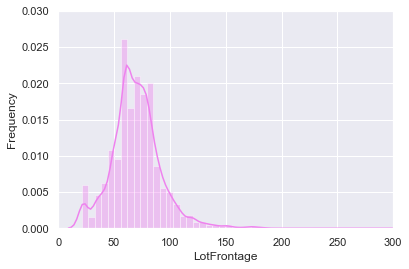

In [6]:
sb.set(style='darkgrid')
sb.distplot(incomplete_num_data['LotFrontage'], color='violet')
plt.xlim(0, 300), plt.ylim(0, 0.030), plt.ylabel('Frequency')
plt.show()
# Mean should be a valid fill value for LotFrontage

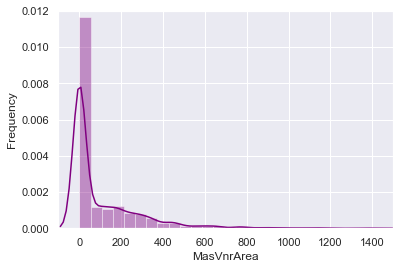

In [7]:
sb.distplot(incomplete_num_data['MasVnrArea'], bins=30, color='purple')
plt.xlim(-100, 1500), plt.ylim(0, 0.012), plt.ylabel('Frequency')
plt.show()
# Median should be a decent fill value for MassVnrArea

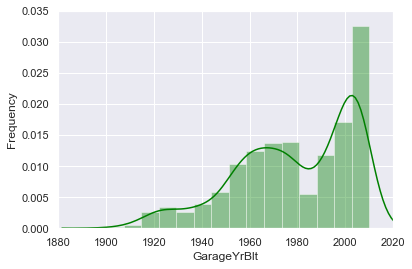

In [8]:
sb.distplot(incomplete_num_data['GarageYrBlt'], color='green')
plt.xlim(1880, 2020), plt.ylim(0, 0.035), plt.ylabel('Frequency')
plt.show()

In [9]:
imputed_num_data = incomplete_num_data.copy()
imputed_num_data['LotFrontage'].fillna(incomplete_num_data['LotFrontage'].mean(), inplace=True)
imputed_num_data['MasVnrArea'].fillna(incomplete_num_data['MasVnrArea'].median(), inplace=True)
imputed_num_data['GarageYrBlt'].fillna(incomplete_num_data['GarageYrBlt'].mean(), inplace=True)
print(len(incomplete_num_data) == len(imputed_num_data.dropna()))

True


In [10]:
def isolate_cat_df(df):
    cat_cols = []
    for x in df.columns:
        if df[x].dtype == 'object':
            cat_cols.append(x)
    return df[cat_cols]

dummy = pd.get_dummies(isolate_cat_df(semiraw))
len(dummy) == len(dummy.dropna())

True

### C. Puting it All Together

In [11]:
df = pd.concat([complete_num_data, imputed_num_data, dummy], axis=1)
df.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,DwellingType_1.5-S Y>=1946 Unfinished,DwellingType_2-S PUD Y>=1946,DwellingType_2-S Y<=1945,DwellingType_2-S Y>=1946,DwellingType_2.5-S,DwellingType_2FamConver,DwellingType_Duplex,DwellingType_Split Foyer,DwellingType_Split/Multilevel,DwellingType_Split/Multilevel PUD
0,8450,7,5,2003,2003,706,0,150,856,856,...,0,0,0,1,0,0,0,0,0,0
1,9600,6,8,1976,1976,978,0,284,1262,1262,...,0,0,0,0,0,0,0,0,0,0
2,11250,7,5,2001,2002,486,0,434,920,920,...,0,0,0,1,0,0,0,0,0,0
3,9550,7,5,1915,1970,216,0,540,756,961,...,0,0,1,0,0,0,0,0,0,0
4,14260,8,5,2000,2000,655,0,490,1145,1145,...,0,0,0,1,0,0,0,0,0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 251 entries, LotArea to DwellingType_Split/Multilevel PUD
dtypes: float64(3), int64(53), uint8(195)
memory usage: 916.9 KB


## III. EDA & DataViz

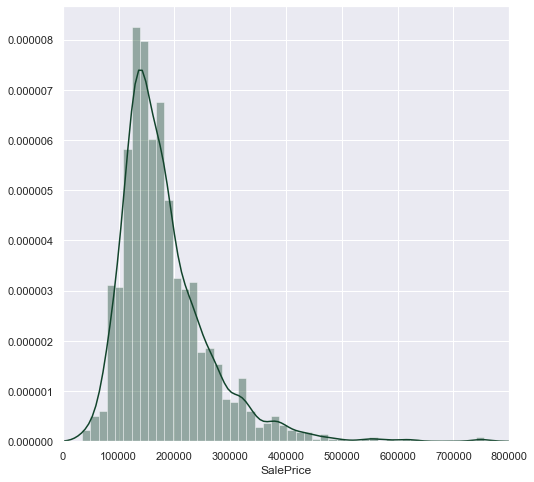

In [128]:
fig, ax = plt.subplots(figsize=(8, 8))
sb.distplot(df['SalePrice'], ax=ax)
plt.xlim(0, 800000)
plt.show()

The SalePrice label seems to have a semi-normal distribution, with some notable outliers. This can be resolved with an $y_t = ln(y)$ transform.

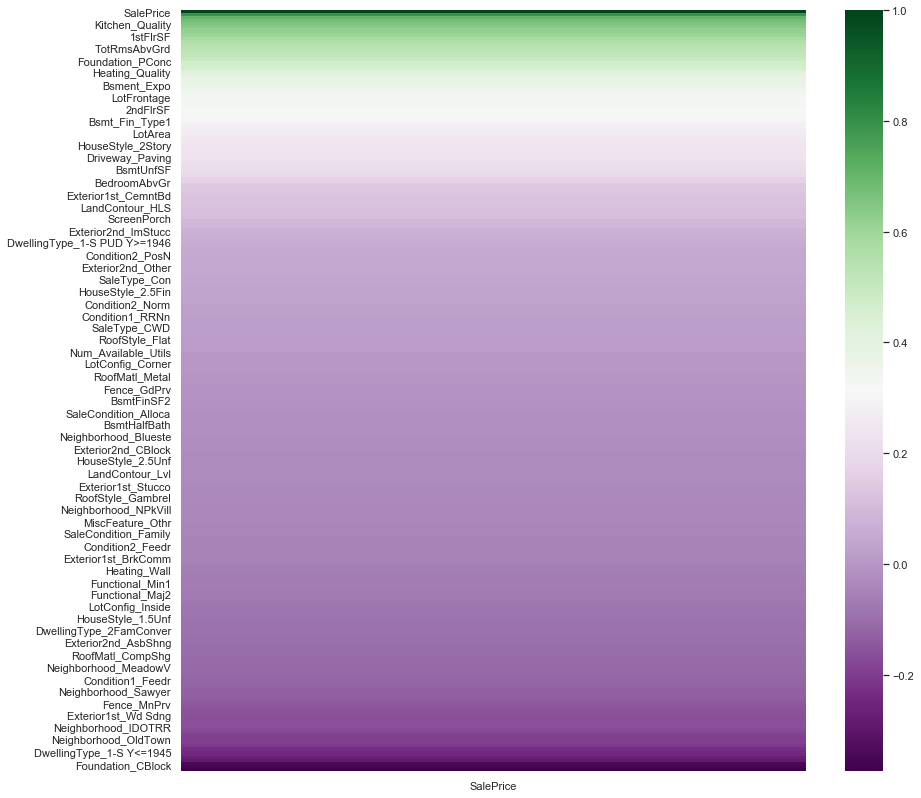

In [129]:
sales_correlations = df.corr().loc['SalePrice'].to_frame().sort_values(by='SalePrice').dropna()[::-1]
fig, ax = plt.subplots(figsize=(14, 14))
sb.heatmap(data=sales_correlations, cmap='PRGn')
plt.show()

In [130]:
strong_correlations = sales_correlations[sales_correlations['SalePrice'] > 0.6]
strong_correlations

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
Ext_Quality,0.682639
Kitchen_Quality,0.659600
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852


So, it looks like overall build quality, above ground living area, and exterior build quality have the biggest correlation to SalePrice.

Below this, kitchen quality, garage area (and number of cars), total basement area, and 1st floor area all wiegh in at similar strengths. 

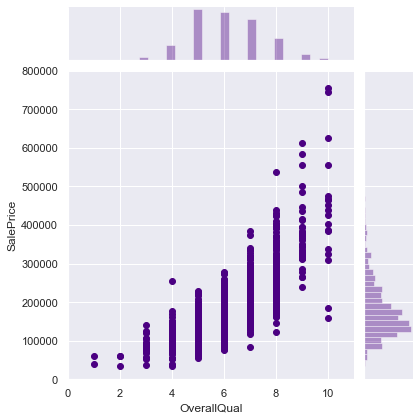

In [121]:
sb.set(style='darkgrid', color_codes=True, palette=sb.diverging_palette(145, 280, s=85, l=25, n=7))
sb.jointplot(x='OverallQual', y='SalePrice', data=df, color='indigo',
            xlim=[0, 11], ylim=[0, 800000])
plt.show()

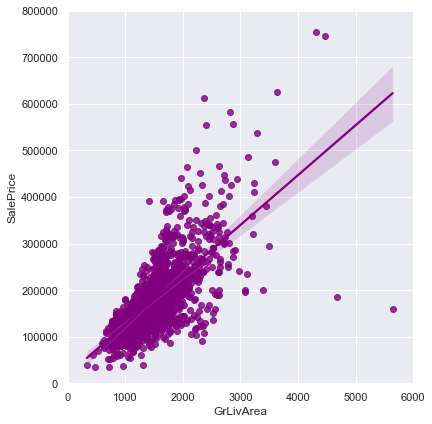

In [112]:
sb.lmplot(x='GrLivArea', y='SalePrice', data=df, height=6,
         scatter_kws={'color': 'purple'}, line_kws={'color': 'purple'})
plt.xlim(0, 6000), plt.ylim(0, 800000)
plt.show()

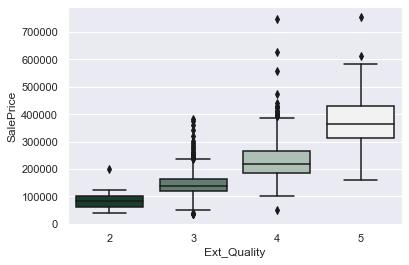

In [116]:
sb.boxplot(x='Ext_Quality', y='SalePrice', data=df)
plt.show()

## IV. Regression Task

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

In [131]:
X = df.drop('SalePrice', axis=1)
y_t = np.log(df['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(X, y_t, test_size=0.33, random_state=42)

In [135]:
lm = LinearRegression()
lm.fit(X_train, y_train)
pred_t = lm.predict(X_test)

print('With LinearRegression(), RMSE is {:,.5f}'.format(np.sqrt(mean_squared_error(y_test, pred_t))))

With LinearRegression(), RMSE is 0.13326


In [173]:
RidgeSearch = GridSearchCV(estimator=Ridge(), param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}, 
                         scoring='neg_root_mean_squared_error')
RidgeSearch.fit(X_train, y_train)

RR = RidgeSearch.best_estimator_
RR.fit(X_train, y_train)
rr_pred_t = RR.predict(X_test)

print('With GridSearch on Ridge(), RMSE is {:,.5f}'.format(np.sqrt(mean_squared_error(y_test, rr_pred_t))))

With GridSearch on Ridge(), RMSE is 0.13662


Since we had some features that seemed less strongly correlated with the SalePrice feature than others, it was the hope that our Ridge regressor might have better accuracy and precision, but it seems simple Linear Regression was best after all.

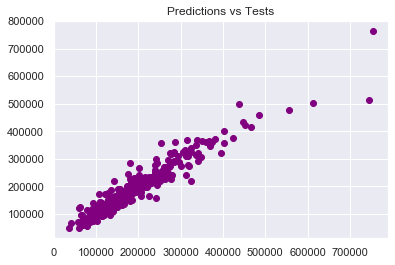

In [167]:
true_test, true_pred = np.exp(y_test), np.exp(predictions)
plt.scatter(true_test, true_pred, c='purple')
plt.title('Predictions vs Tests')
plt.show() 

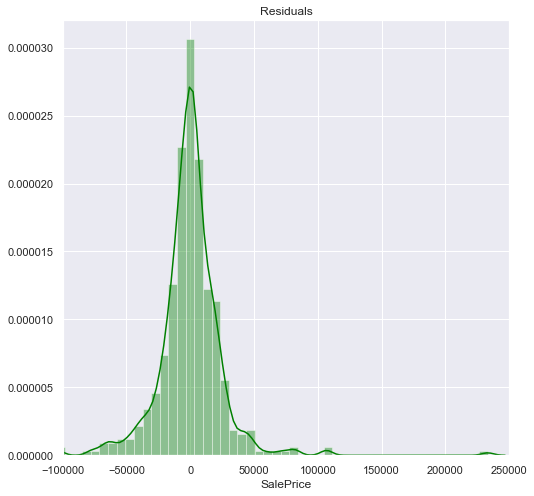

In [165]:
fig, ax = plt.subplots(figsize=(8, 8))
sb.distplot((true_test-true_pred), bins=50, color='green', ax=ax)
plt.xlim(-100000, 250000), plt.ylim(0, 0.000032), plt.title('Residuals')
plt.show()